In [2]:
import pandas as pd
import numpy as np

In [110]:
df_w = pd.read_csv("https://raw.githubusercontent.com/fenago/data-analysis-pandas/master/lab_04/data/nyc_weather_2018.csv", parse_dates=['date'])

In [25]:
df_fb = pd.read_csv("https://raw.githubusercontent.com/fenago/data-analysis-pandas/master/lab_04/data/fb_2018.csv", index_col='date', parse_dates=True ).assign(   trading_volume = lambda x: pd.cut( x.volume, bins=3, labels=['low','med','high']  )   )

volum:

- 10,10,10,11,20,20: Low
- 25,25,30,30,30: Med
- 35: High




In [196]:
df_fb

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,low
2018-12-26,126.00,134.24,125.8900,134.18,39723370,low
2018-12-27,132.44,134.99,129.6700,134.52,31202509,low


In [42]:
# df_w.drop('attributes',inplace=True, axis=1)

In [44]:
# df_w.drop('station',inplace=True, axis=1)

In [112]:
df_w.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [70]:
df_w

,date,datatype,value
0,2018-01-01,PRCP,0.0
1,2018-01-01,PRCP,0.0
2,2018-01-01,SNOW,0.0
3,2018-01-01,PRCP,0.0
4,2018-01-01,SNOW,0.0
...,...,...,...
78775,2018-12-31,WDF5,130.0
78776,2018-12-31,WSF2,9.8
78777,2018-12-31,WSF5,12.5
78778,2018-12-31,WT01,1.0


In [73]:
df_w['datatype'].unique()

array(['PRCP', 'SNOW', 'SNWD', 'WESF', 'WESD', 'TMAX', 'TMIN', 'TOBS',
       'AWND', 'TAVG', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'PGTM', 'DAPR',
       'MDPR', 'WT01', 'WT02', 'WT09', 'WT08', 'WT04', 'WT06', 'WT03',
       'WT11', 'WT05', 'TSUN'], dtype=object)

In [95]:
# df_w_w= df_w.pivot_table( index=['date'], columns='datatype', values='value', aggfunc='mean' )
# df_w_w.drop(['WT11','WT05','WT04','WT03','WT02','WT01','WDF2','WDF5','WESD','WESF','WSF2','TOBS','AWND','DAPR','MDPR','PGTM','WSF5','WT06','WT08','WT09','TSUN'], axis=1, inplace=True)
# df_w_w.set_index('date',inplace=True)

In [115]:
df_w_2 = df_w.reset_index()

In [137]:
df_w_2 = df_w.reset_index().pivot_table( index=['date','station'] , columns='datatype',values='value',aggfunc='first').reset_index()
df_w_2.drop(['WT11','WT05','WT04','WT03','WT02','WT01','WDF2','WDF5','WESD','WESF','WSF2','TOBS','AWND','DAPR','MDPR','PGTM','WSF5','WT06','WT08','WT09','TSUN'], axis=1, inplace=True)
df_w_2.set_index('date',inplace=True)
df_w_2.drop(['station'], axis=1, inplace=True)
df_w_2.fillna(0,inplace=True)

In [138]:
df_w_2

datatype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
date,,,,,,
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,3.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,25.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2018-12-31,28.7,0.0,0.0,0.0,8.3,-2.7
2018-12-31,25.9,0.0,0.0,0.0,8.9,2.2
2018-12-31,29.2,0.0,0.0,0.0,8.3,-1.0


In [139]:
df_w_2['2018-01-01':'2018-01-02']

datatype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
date,,,,,,
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,3.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,25.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2018-01-02,0.0,0.0,0.0,0.0,-3.8,-10.5
2018-01-02,0.0,0.0,0.0,0.0,-3.2,-10.5
2018-01-02,0.0,0.0,0.0,0.0,-1.6,-11.0


In [148]:
df_w_2_merged = df_w_2.groupby('date').max()
df_w_2_merged_2 = df_w_2.groupby('date').mean()

In [149]:
df_w_2_merged

datatype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
date,,,,,,
2018-01-01,0.0,25.0,51.0,0.0,0.0,0.0
2018-01-02,0.0,0.0,51.0,0.0,0.0,0.0
2018-01-03,0.0,0.0,38.0,0.0,0.0,0.0
2018-01-04,22.6,318.0,318.0,0.0,0.0,0.0
2018-01-05,63.0,381.0,457.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2018-12-27,0.0,0.0,0.0,5.1,9.4,3.9
2018-12-28,32.0,0.0,0.0,9.1,15.6,6.1
2018-12-29,31.8,0.0,0.0,11.3,15.6,8.3


In [150]:
df_w_2_merged_2

datatype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
date,,,,,,
2018-01-01,0.000000,0.357143,3.114286,-0.474286,-1.481429,-3.034286
2018-01-02,0.000000,0.000000,2.657534,-0.315068,-0.923288,-2.524658
2018-01-03,0.000000,0.000000,1.608108,-0.244595,-0.564865,-2.298649
2018-01-04,4.346032,52.158730,23.841270,-0.174603,-0.476190,-2.219048
2018-01-05,9.990769,112.769231,100.169231,-0.413846,-1.260000,-2.876923
...,...,...,...,...,...,...
2018-12-27,0.000000,0.000000,0.000000,0.190278,1.133333,0.004167
2018-12-28,10.413415,0.000000,0.000000,0.310976,1.829268,0.500000
2018-12-29,18.108861,0.000000,0.000000,0.412658,2.244304,0.759494


In [151]:
df_w_2_merged_2['2018-Q1']

<ipython-input-151-7365fb700d30>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_w_2_merged_2['2018-Q1']


datatype,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
date,,,,,,
2018-01-01,0.000000,0.357143,3.114286,-0.474286,-1.481429,-3.034286
2018-01-02,0.000000,0.000000,2.657534,-0.315068,-0.923288,-2.524658
2018-01-03,0.000000,0.000000,1.608108,-0.244595,-0.564865,-2.298649
2018-01-04,4.346032,52.158730,23.841270,-0.174603,-0.476190,-2.219048
2018-01-05,9.990769,112.769231,100.169231,-0.413846,-1.260000,-2.876923
...,...,...,...,...,...,...
2018-03-27,0.032353,0.000000,0.000000,0.147059,1.486765,-0.326471
2018-03-28,1.280519,0.000000,0.000000,0.223377,1.509091,0.174026
2018-03-29,0.309589,0.000000,0.000000,0.372603,1.928767,1.020548


In [170]:
df_fb['2018-01']

<ipython-input-170-14e068e09b00>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_fb['2018-01']


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
2018-01-09,188.70,188.80,187.1000,187.87,12393057,low
2018-01-10,186.94,187.89,185.6300,187.84,10529894,low
2018-01-11,188.40,188.40,187.3800,187.77,9588587,low
2018-01-12,178.06,181.48,177.4000,179.37,77551299,med


In [173]:
fb_reindexed = df_fb.reindex(  pd.date_range('2018-01-01','2018-12-31',freq='D') )





In [177]:
fb_reindexed.asof('2018-03-31')

open                  155.15
high                  161.42
low                   154.14
close                 159.79
volume            59434293.0
trading_volume           low
Name: 2018-03-31 00:00:00, dtype: object

In [179]:
df_fb.agg({
           'open':np.mean,
           'close':np.mean,
           'low':np.min,
           'high':np.max,
           'volume':np.sum
})

open      1.714544e+02
close     1.715109e+02
low       1.230200e+02
high      2.186200e+02
volume    6.949682e+09
dtype: float64

In [187]:
fb_agg = df_fb.groupby('trading_volume').agg( {
          'open':'mean',
           'close':'mean',
           'low':['min','max'],
           'high':['min','max']
} )
fb_agg

open       close     low            high        
                      mean        mean     min     max     min     max
trading_volume                                                        
low             171.355565  171.431771  123.02  212.60  129.74  216.20
med             175.818125  175.143750  150.75  214.27  162.85  218.62
high            167.726667  168.156667  149.02  173.75  161.10  180.13

In [188]:
df_fb[ ['open','high','low','close'] ].transform(   lambda x: (x-x.mean()).div( x.std() )         )

,open,high,low,close
date,,,,
2018-01-02,0.316285,0.410048,0.410817,0.496012
2018-01-03,0.529662,0.574794,0.599116,0.658696
2018-01-04,0.683091,0.648415,0.737083,0.641677
2018-01-05,0.718146,0.683938,0.778449,0.767819
2018-01-08,0.799940,0.786904,0.848190,0.839400
...,...,...,...,...
2018-12-24,-2.456605,-2.258838,-2.305581,-2.375225
2018-12-26,-2.309273,-2.027164,-2.162612,-1.868654
2018-12-27,-1.982094,-1.988551,-1.974313,-1.851635


In [189]:
df_fb.pivot_table( columns='trading_volume' )

trading_volume,low,med,high
close,1.714318e+02,1.751438e+02,1.681567e+02
high,1.734610e+02,1.794200e+02,1.704767e+02
low,1.693063e+02,1.721075e+02,1.615733e+02
open,1.713556e+02,1.758181e+02,1.677267e+02
volume,2.454721e+07,7.907256e+07,1.419240e+08


In [194]:
pd.crosstab(
    index=df_fb.trading_volume,
    columns=df_fb.index.month,
    colnames=['month'],
    normalize='columns'
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,0.952381,1.0,0.714286,0.952381,1.0,1.0,0.857143,1.0,1.0,1.0,1.0,1.0
med,0.047619,0.0,0.190476,0.047619,0.0,0.0,0.095238,0.0,0.0,0.0,0.0,0.0
high,0.000000,0.0,0.095238,0.000000,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.0


In [195]:
pd.crosstab(
    index=df_fb.trading_volume,
    columns=df_fb.index.month,
    colnames=['month'],
    values=df_fb.close,
    aggfunc=np.mean
)

month,1,2,3,4,5,6,7,8,9,10,11,12
trading_volume,,,,,,,,,,,,
low,185.2425,180.269474,177.067333,163.293,182.93,195.267619,201.916111,177.491957,164.377368,154.187826,141.635714,137.161053
med,179.3700,NaN,164.765000,174.160,NaN,NaN,194.280000,NaN,NaN,NaN,NaN,NaN
high,NaN,NaN,164.105000,NaN,NaN,NaN,176.260000,NaN,NaN,NaN,NaN,NaN


In [197]:
import matplotlib.pyplot as plt

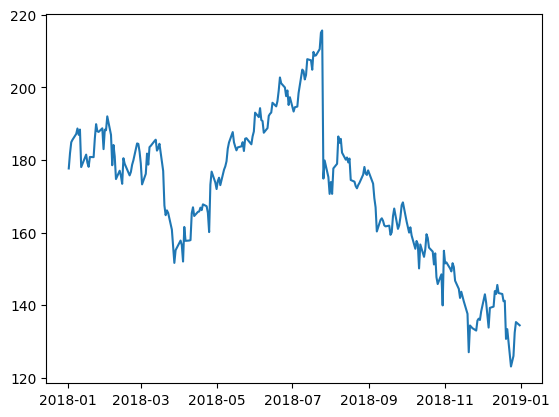

In [198]:
plt.plot( df_fb.index, df_fb.open )
plt.show()

In [199]:
df_fb

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low
...,...,...,...,...,...,...
2018-12-24,123.10,129.74,123.0200,124.06,22066002,low
2018-12-26,126.00,134.24,125.8900,134.18,39723370,low
2018-12-27,132.44,134.99,129.6700,134.52,31202509,low


[]

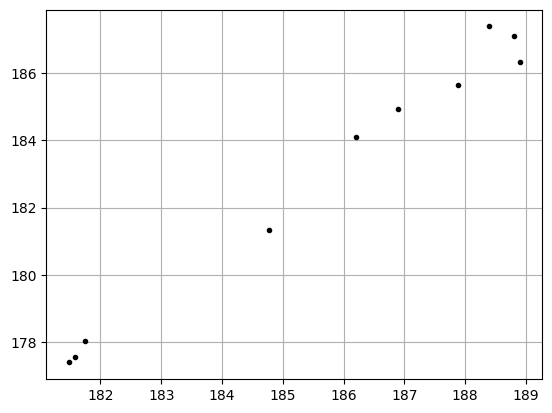

In [211]:
plt.plot('high','low','.k', data=df_fb.head(10) )
plt.grid(True)
plt.plot()

[]

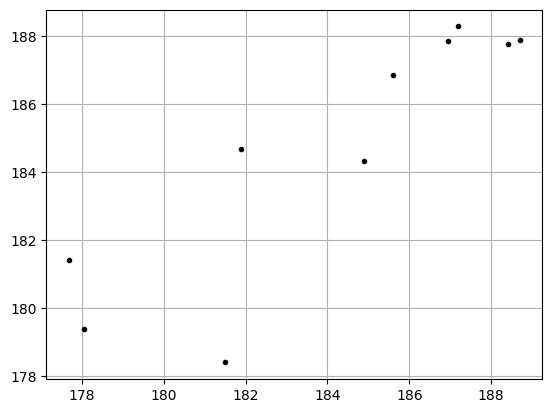

In [212]:
plt.plot('open','close','.k', data=df_fb.head(10) )
plt.grid(True)
plt.plot()